<a href="https://colab.research.google.com/github/ilikemichael/ml1216/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [18]:
# mnist: 必須要reshape(6000, 28, 28, 1), 注意這裡跟MLP不一樣, 這裡面是一個list, 裡面只有一個
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [19]:
labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"     
]

ship


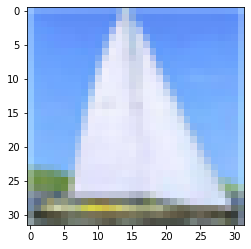

In [20]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 49999)
print(labels[y_train[idx][0]])
plt.imshow(x_train[idx])

In [21]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
layers = [
    #1個filter(3 * 3 * 3) * 64個深度 + 64(bias) = 1792
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1(3 * 3 * 64) * 128個 + 128(bias) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [22]:

x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [23]:

from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [24]:

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("model.h5", save_best_only=True)
]
# validation_split: 切出一部分資料驗證
# batch_size: 看多少筆才做一次調整(梯度下降)
# epochs: 訓練次數(60000-6000筆/epoch)
# 1 epoch 多少次梯度下降: 54000 / 200 -> 270
# verbose: 印出多少log(1:default 0:quiet 2:)
model.fit(x_train_norm, 
     y_train,
     validation_split=0.1,
     batch_size=200,
     epochs=50,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
225/225 - 3s - loss: 1.6005 - accuracy: 0.4148 - val_loss: 1.3017 - val_accuracy: 0.5232
Epoch 2/50
225/225 - 3s - loss: 1.1715 - accuracy: 0.5850 - val_loss: 0.9981 - val_accuracy: 0.6440
Epoch 3/50
225/225 - 3s - loss: 0.9766 - accuracy: 0.6571 - val_loss: 0.8580 - val_accuracy: 0.7046
Epoch 4/50
225/225 - 3s - loss: 0.8349 - accuracy: 0.7102 - val_loss: 0.7932 - val_accuracy: 0.7228
Epoch 5/50
225/225 - 3s - loss: 0.7317 - accuracy: 0.7439 - val_loss: 0.7317 - val_accuracy: 0.7456
Epoch 6/50
225/225 - 3s - loss: 0.6474 - accuracy: 0.7727 - val_loss: 0.7384 - val_accuracy: 0.7466
Epoch 7/50
225/225 - 3s - loss: 0.5721 - accuracy: 0.7988 - val_loss: 0.6882 - val_accuracy: 0.7610
Epoch 8/50
225/225 - 3s - loss: 0.5037 - accuracy: 0.8237 - val_loss: 0.6800 - val_accuracy: 0.7712
Epoch 9/50
225/225 - 3s - loss: 0.4439 - accuracy: 0.8451 - val_loss: 0.6977 - val_accuracy: 0.7698
Epoch 10/50
225/225 - 3s - loss: 0.3756 - accuracy: 0.8681 - val_loss: 0.6828 - val_accuracy: 0.7702

In [25]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7206 - accuracy: 0.7587


[0.720589816570282, 0.7587000131607056]

In [26]:
#把y_test改成一維的資料
y_test_r = y_test.reshape(-1)
y_test_r

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [27]:
# sklearn: predict_proba/predict
# keras: predict/predict_classes
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat,
       index=["{}(真實)".format(labels[i]) for i in range(10)],
       columns=["{}(預測)".format(labels[i]) for i in range(10)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),871,11,30,13,13,7,7,3,31,14
automobile(真實),31,875,9,5,2,2,8,5,24,39
bird(真實),78,7,681,32,70,46,35,43,5,3
cat(真實),39,5,71,521,66,167,61,50,9,11
deer(真實),32,4,80,28,708,25,28,86,8,1
dog(真實),15,3,53,127,36,663,13,84,4,2
frog(真實),8,5,62,38,39,18,811,11,5,3
horse(真實),20,1,31,18,36,36,1,851,1,5
ship(真實),89,23,14,12,7,4,3,3,831,14
truck(真實),59,92,9,11,3,9,6,16,20,775


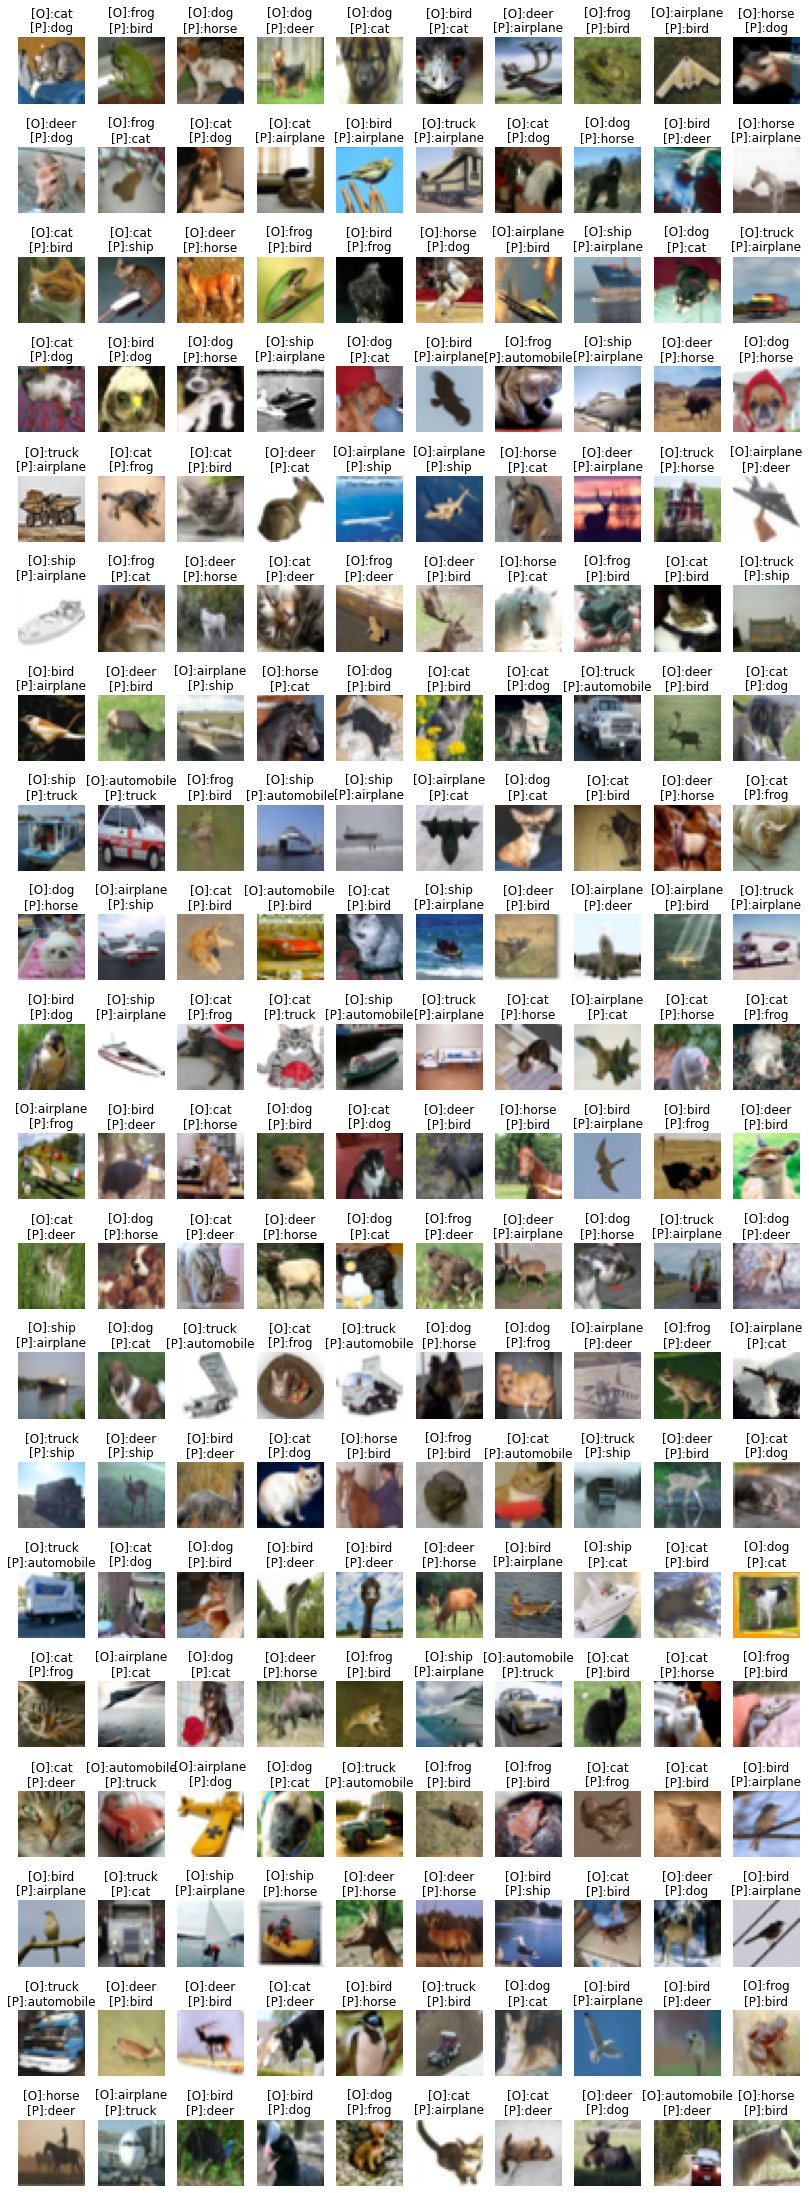

In [28]:

import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
false_pre = pre[idx]
false_ori = y_test_r[idx]
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(labels[false_ori[i]], labels[false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])

url:https://images.chinatimes.com/newsphoto/2019-03-24/656/20190324002225.jpg
airplane 的機率: 1.0
automobile 的機率: 0.0
bird 的機率: 0.0
cat 的機率: 0.0
deer 的機率: 0.0
dog 的機率: 0.0
frog 的機率: 0.0
horse 的機率: 0.0
ship 的機率: 0.0
truck 的機率: 0.0
答案: airplane


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


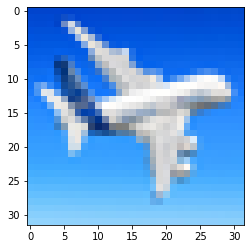

In [29]:

from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
import requests
url = input("url:")
headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"
}
response = requests.get(url, stream=True, verify=False, headers=headers)

img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img = np.array(img)
#把img_r由一維改成四維,符合輸入條件
img_r = img.reshape(1, 32, 32, 3) / 255
proba = model.predict(img_r)[0]
for i in range(10):
    print(labels[i], "的機率:", round(proba[i], 3))
ans = model.predict_classes(img_r)[0]
print("答案:", labels[ans])
plt.imshow(img, cmap="gray")